# Ch06 t-Distributed Stochastic Neighbor Embedding (t-SNE)

# Exercise 24: t-SNE MNIST

1. For this exercise, import pickle, numpy, PCA, and TSNE from scikit-learn, as well as matplotlib

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

2. Load and visualize the MNIST dataset that is provided with the accompanying source code

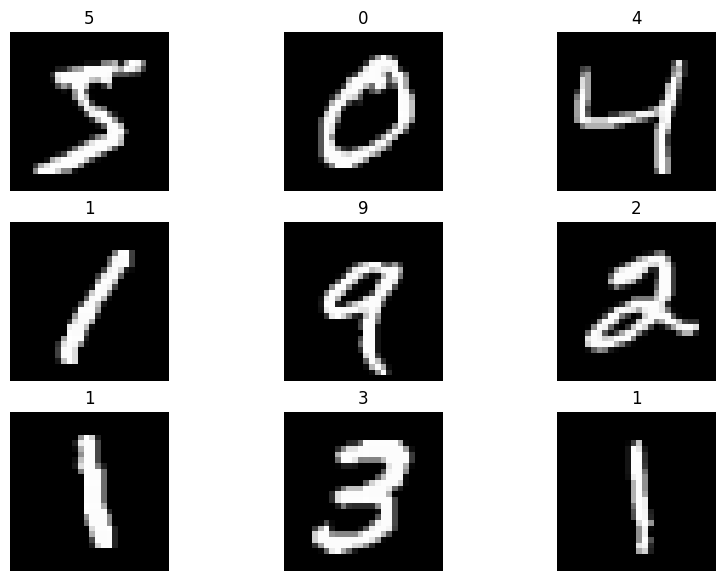

In [2]:
with open('mnist.pkl', 'rb') as f:
    mnist = pickle.load(f)

plt.figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(mnist['images'][i], cmap='gray')
    plt.title(mnist['labels'][i])
    plt.axis('off')
plt.show()

3. In this exercise, we will use PCA on the dataset to reduce extract only the first 30 components

In [3]:
model_pca = PCA(n_components=30)
mnist_pca = model_pca.fit(mnist['images'].reshape((-1, 28 ** 2)))

4. Visualize the effect of reducing the dataset to 30 components. To do this, we must first transform the dataset into the lower-dimensional space and then use the inverse_transform method to return the data to its original size for plotting. We will, of book, need to reshape the data before and after the transform process

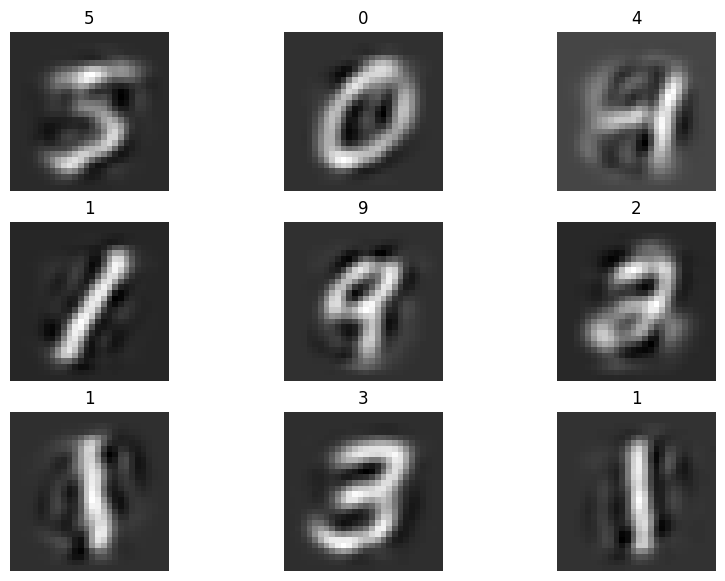

In [4]:
mnist_30comp = model_pca.transform(mnist['images'].reshape((-1, 28 ** 2)))
mnist_30comp_vis = model_pca.inverse_transform(mnist_30comp)
mnist_30comp_vis = mnist_30comp_vis.reshape((-1, 28, 28))

plt.figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(mnist_30comp_vis[i], cmap='gray')
    plt.title(mnist['labels'][i])
    plt.axis('off')
plt.show()

5. Now, we will apply t-SNE to the PCA-transformed data to visualize the 30 components in two-dimensional space. We can construct a t-SNE model in scikit-learn using the standard model API interface. We will start off using the default values that specify that we are embedding the 30 dimensions into two for visualization, using a perplexity of 30, a learning rate of 200, and 1,000 iterations. We will specify a random_state value of 0 and set verbose to 1

In [5]:
model_tsne = TSNE(random_state=0, verbose=1)
model_tsne

TSNE(random_state=0, verbose=1)

6. Use t-SNE to transform the decomposed dataset of MNIST:

In [6]:
mnist_tsne = model_tsne.fit_transform(mnist_30comp)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...


AttributeError: 'NoneType' object has no attribute 'split'

7. Now, visualize the number of dimensions in the returned dataset

In [7]:
mnist_tsne.shape

NameError: name 'mnist_tsne' is not defined

8. Create a scatter plot of the two-dimensional data produced by the model

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(mnist_tsne[:,0], mnist_tsne[:,1], s=5)
plt.title('Low Dimensional Representation of MNIST');

9. Plot the two-dimensional data grouped by the corresponding image label, and use markers to separate the individual labels. Along with the data, add the image labels to the plot to investigate the structure of the embedded data

In [ ]:
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of MNIST');
for i in range(10):
    selections = mnist_tsne[mnist['labels'] == i]
    plt.scatter(selections[:,0], selections[:,1], alpha=0.2, marker=MARKER[i], s=5);
    x, y = selections.mean(axis=0)
    plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30})
plt.show()

10. Get the index of all the number threes in the dataset

In [ ]:
threes = np.where(mnist['labels'] == 3)[0]
threes

11. Find the threes that were plotted with an x value of less than 0

In [ ]:
tsne_threes = mnist_tsne[threes]
far_threes = np.where(tsne_threes[:,0]< 0)[0]
far_threes

12. Display the coordinates to find one that is reasonably far from the three cluster

In [ ]:
tsne_threes[far_threes]

13. Chose a sample with a reasonably high negative value as an x coordinate. In this example, we will select the fourth sample, which is sample 10. Display the image for the sample

In [ ]:
plt.imshow(mnist['images'][10], cmap='gray')
plt.axis('off');
plt.show()

# Activity 12: Wine t-SNE

1. Import pandas, numpy, matplotlib, and the t-SNE and PCA models from scikit-learn

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

2. Load the Wine dataset using the wine.data file included in the accompanying source code and display the first five rows of data

In [9]:
df = pd.read_csv('wine.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


3. The first column contains the labels; extract this column and remove it from the dataset

In [10]:
labels = df[0]
del df[0] 

4. Execute PCA to reduce the dataset to the first six components

In [11]:
model_pca = PCA(n_components=6)
wine_pca = model_pca.fit_transform(df)

5. Determine the amount of variance within the data described by these six components

In [12]:
np.sum  (model_pca.explained_variance_ratio_)

0.9999931482453599

6. Create a t-SNE model using a specified random state and a verbose value of 1

In [13]:
tsne_model = TSNE(random_state=0, verbose=1)
tsne_model

TSNE(random_state=0, verbose=1)

7. Fit the PCA data to the t-SNE model

In [14]:
wine_tsne = tsne_model.fit_transform(wine_pca.reshape((len(wine_pca), -1)))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...


AttributeError: 'NoneType' object has no attribute 'split'

8. Confirm that the shape of the t-SNE fitted data is two dimensional

In [ ]:
wine_tsne.shape

9. Create a scatter plot of the two-dimensional data

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(wine_tsne[:,0], wine_tsne[:,1]);
plt.title('Low Dimensional Representation of Wine');

10. Create a secondary scatter plot of the two-dimensional data with the class labels applied to visualize any clustering that may be present.

In [ ]:
MARKER = ['o', 'v', '^',]
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of Wine');
for i in range(1, 4):
    selections = wine_tsne[labels == i]
    plt.scatter(selections[:,0], selections[:,1], marker=MARKER[i-1], label=f'Wine {i}', s=30);
    plt.legend();

# Exercise 25: t-SNE MNIST and Perplexity

1. Import pickle, numpy, matplotlib, and PCA and t-SNE from scikit-learn

In [15]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

2. Load the MNIST dataset

In [16]:
with open('mnist.pkl', 'rb') as f:
    mnist = pickle.load(f)

3. Using PCA, select only the first 30 components of variance from the image data

In [17]:
model_pca = PCA(n_components=30)
mnist_pca = model_pca.fit_transform(mnist['images'].reshape((-1, 28 ** 2)))

4. In this exercise, we are investigating the effect of perplexity on the t-SNE manifold. Iterate through a model/plot loop with a perplexity of 3, 30, and 300

In [18]:
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
for perp in [3, 30, 300]:
    model_tsne = TSNE(random_state=0, verbose=1, perplexity=perp)
    mnist_tsne = model_tsne.fit_transform(mnist_pca)

    plt.figure(figsize=(10, 7))
    plt.title(f'Low Dimensional Representation of MNIST (perplexity = {perp})');
    for i in range(10):
        selections = mnist_tsne[mnist['labels'] == i]
        plt.scatter(selections[:,0], selections[:,1], alpha=0.2, marker=MARKER[i], s=5);
        x, y = selections.mean(axis=0)
        plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30})   

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...


AttributeError: 'NoneType' object has no attribute 'split'